# 1. Instalación de librerias en python

In [ ]:
!pip install pandas
!pip install pandas_datareader
!pip install datetime
!pip install matplotlib

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 174kB 23.0MB/s 


# 2. Habilitando las librerias

In [ ]:
import pandas as pd
import pandas_datareader.data as web   # Importacion de las libreias
from pandas_datareader import data
import datetime
import matplotlib.pyplot as plt
import numpy as np

# 3. Lectura de los datos

In [ ]:
# Fecha de información
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
#end = datetime.datetime(2016,12,31)

microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
gsp = web.DataReader("^GSPC", "yahoo", start, end)

# Lectura del precio de las acciones de Apple desde Yahoo Finance!
stocks = pd.DataFrame({"GOOG": google["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "^GSPC": gsp["Adj Close"]})



In [ ]:
stocks.head()

,GOOG,MSFT,^GSPC
Date,,,
2017-01-03,786.140015,59.496574,2257.830078
2017-01-04,786.900024,59.230362,2270.750000
2017-01-05,794.020020,59.230362,2269.000000
2017-01-06,806.150024,59.743763,2276.979980
2017-01-09,806.650024,59.553616,2268.899902


In [ ]:
stocks.tail()

,GOOG,MSFT,^GSPC
Date,,,
2019-10-28,1290.000000,144.190002,3039.419922
2019-10-29,1262.619995,142.830002,3036.889893
2019-10-30,1261.290039,144.610001,3046.770020
2019-10-31,1260.109985,143.369995,3037.560059
2019-11-01,1273.739990,143.720001,3066.909912


In [ ]:
type(stocks)

pandas.core.frame.DataFrame

In [ ]:
stocks.head(9)

,GOOG,MSFT,^GSPC
Date,,,
2017-01-03,786.140015,59.496574,2257.830078
2017-01-04,786.900024,59.230362,2270.750000
2017-01-05,794.020020,59.230362,2269.000000
2017-01-06,806.150024,59.743763,2276.979980
2017-01-09,806.650024,59.553616,2268.899902
2017-01-10,804.789978,59.534603,2268.899902
2017-01-11,807.909973,60.076519,2275.320068
2017-01-12,806.359985,59.525097,2270.439941
2017-01-13,807.880005,59.610664,2274.639893


In [ ]:
stocks.shape

(714, 3)

In [ ]:
stocks.describe()

,GOOG,MSFT,^GSPC
count,714.000000,714.000000,714.000000
mean,1060.632338,96.567270,2678.488542
std,125.039321,24.731446,207.562939
min,786.140015,59.230362,2257.830078
25%,967.250015,71.981247,2486.332520
50%,1077.145020,96.722065,2711.594971
75%,1164.232483,111.549257,2847.477600
max,1290.000000,144.610001,3066.909912


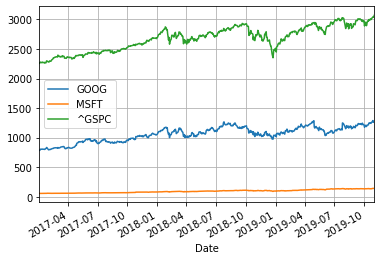

In [ ]:
# Graficando el valor de las acciones
#-----------------------------------------------
stocks.plot(grid = True)

In [ ]:
# Configuracion de revision mensual #3M y #D
all_weekdays = pd.date_range(start=start, end=end, freq='M')

close = stocks.reindex(all_weekdays)
close = close.fillna(method='ffill')

In [ ]:
close.shape

(34, 3)

In [ ]:
close.describe()

,GOOG,MSFT,^GSPC
count,34.000000,34.000000,34.000000
mean,1062.144411,96.997461,2679.218247
std,129.705571,24.599690,207.668603
min,796.789978,61.196365,2278.870117
25%,977.804993,74.343376,2480.449951
50%,1089.710022,96.937828,2708.505005
75%,1157.434967,111.082834,2808.340027
max,1260.109985,143.369995,3037.560059


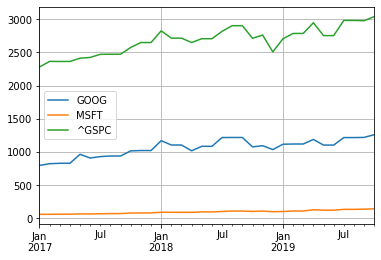

In [ ]:
# Graficando el valor de las acciones
#-----------------------------------------------
close.plot(grid = True)

# 4. Analisis de Tendencia: 
# Graficas de medias moviles Rolling

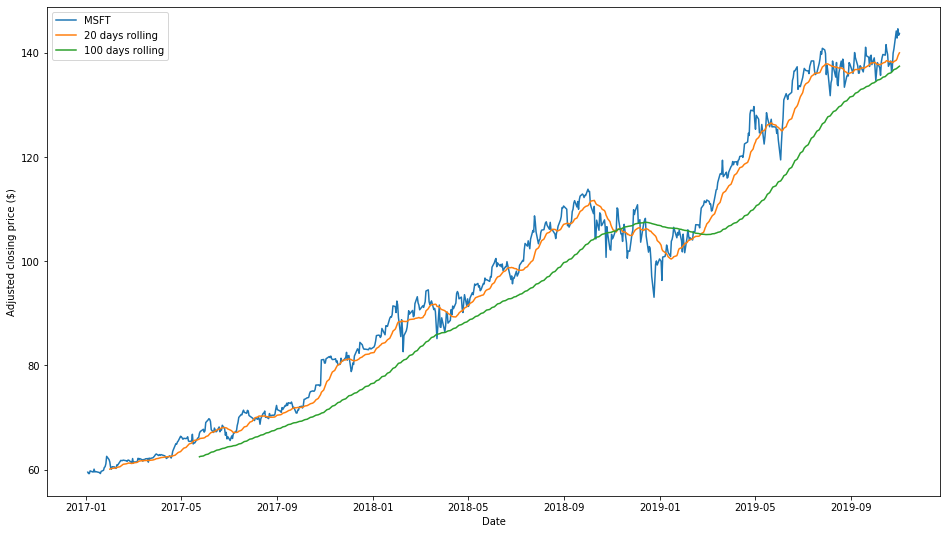

In [ ]:
# Selecionamos una columna de precios.
msft = stocks.loc[:, 'MSFT']

# Medias Moviles de corto plazo (20) y largo plazo (100)
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()
#mid_rolling_msft = msft.rolling(window=50).mean()

# Agregando el grafico con las medis moviles
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
#ax.plot(mid_rolling_msft.index, mid_rolling_msft, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

# 5. Analisis de Volatilidad:
# Bandas de Bollinger

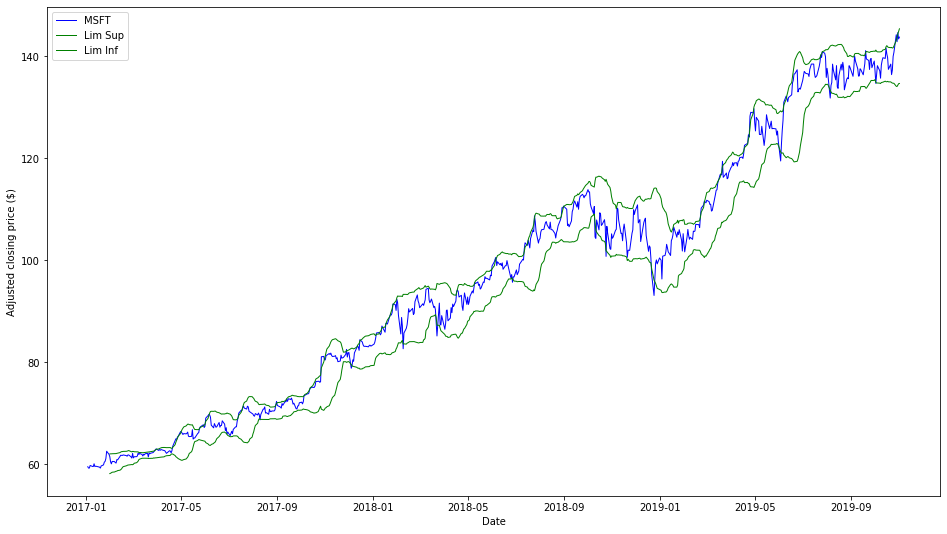

In [ ]:
# Indicadores de volatilidad

msft_mean = msft.rolling(window=20).mean()
msft_sd = msft.rolling(window=20).std()
msft_up = msft_mean + (msft_sd * 2)
msft_low = msft_mean - (msft_sd * 2)
    
# Graficando las bandas de volatilidad
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT',color='blue', lw=1)
ax.plot(msft_up.index, msft_up, label='Lim Sup',color='green', lw=1)
ax.plot(msft_low.index, msft_low, label='Lim Inf',color='green', lw=1)

#Etiquetas y leyendas

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


#https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300


# 6. Analisis de Oscilacion o Fuerza del precio
# Indicador RSI

In [ ]:
# Si el RSI alcanza el nivel de 70 hay que interpretar que la accion está sobrecomprado (cuyo significado es que el especulador debería plantearse vender).
# Y análogamente al contrario, sobrevendido en el nivel de 30.
# La hipótesis sería que cuando hay una alta proporción de 
# movimientos diarios en una dirección esto sugiere que se alcanzará el extremo, y los precios tenderán a darse la vuelta.

#Teoria de RSI
# https://www.21tradingcoach.com/es/formaci%C3%B3n-gratuita/an%C3%A1lisis-t%C3%A9cnico/165-indicador-rsi-relative-strength-index

#Libreri Tab Lib
# https://towardsdatascience.com/trading-strategy-technical-analysis-with-python-ta-lib-3ce9d6ce5614


In [ ]:

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi



In [ ]:
df=msft
msft_rsi=rsiFunc(df)

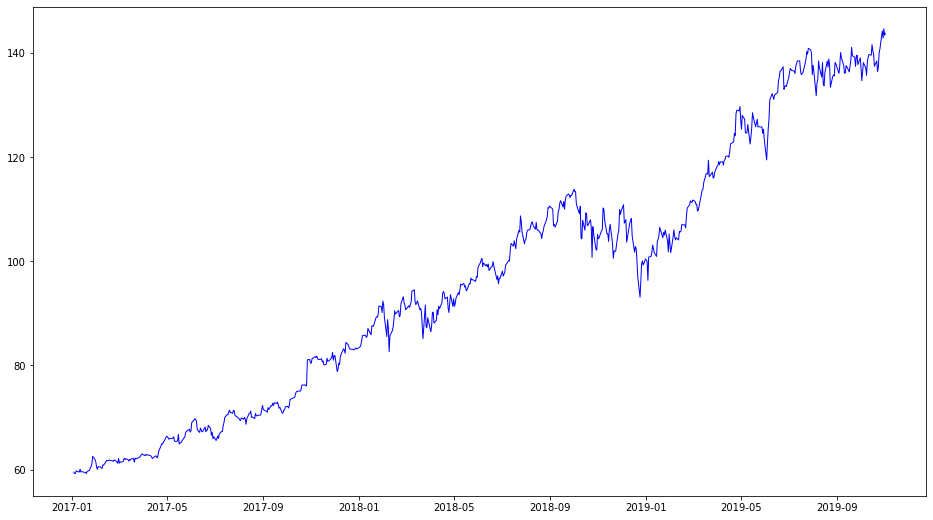

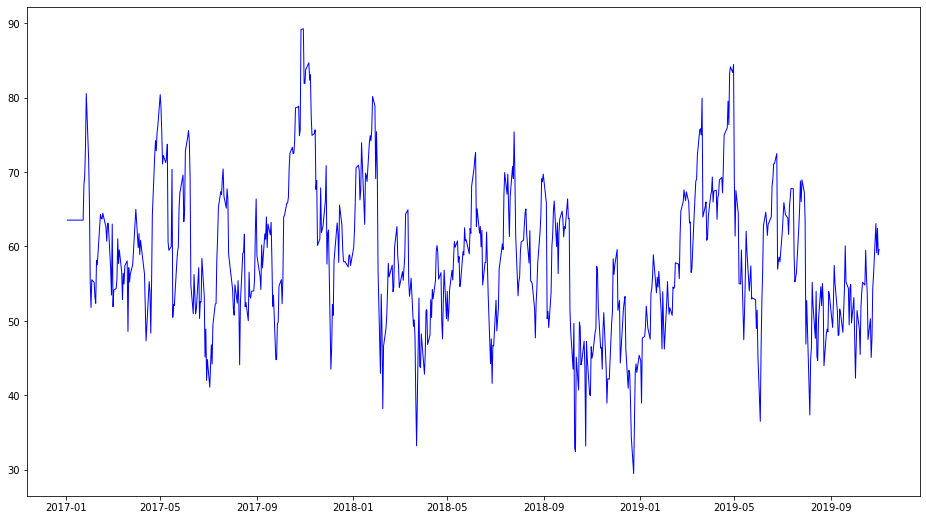

In [ ]:
# Graficando el valor de la accion
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(msft.index, msft, label='MSFT',color='blue', lw=1)


# Graficando el  RSI o indicador del volumne de negociacion
fig, ax2 = plt.subplots(figsize=(16,9))
ax2.plot(msft.index, msft_rsi, label='MSFT',color='blue', lw=1)




In [ ]:
# Librerias disponibles para Velas Japonesas
import plotly.plotly as py
import plotly.graph_objs as go

ImportError: ignored

In [ ]:
# Extrayendo los 4 datos del precio de laccion de Microsoft

start = datetime.datetime(2017,1,1)
end = datetime.date.today()
#end = datetime.datetime(2016,12,31)

df = web.DataReader("MSFT", "yahoo", start, end)


In [ ]:
df.head(5)

In [ ]:
# Grafica de Vela Japonesa

trace = go.Candlestick(x=df.index,
                open=df.Open,
                high=df.High,
                low=df.Low,
                close=df.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')



NameError: ignored